[Reference](https://medium.com/sfu-cspmp/principal-component-analysis-deciphered-79968b47d46c)

# Feature Reduction

In [1]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

def plot_slice(X, tX, itX=None, axis_i=0, axis_j=1):
    """
    Define a helper function.
    """
    
    species = X.target
    n_plots = 2
    if itX is not None:
        n_plots = 3
    
    plt.figure(figsize=(4 * n_plots, 4))
    plt.subplot(1, n_plots, 1)
    plt.title('Data')
    plt.plot(X.data[species == 0, axis_i], X.data[species == 0, axis_j], "o", color='navy')
    plt.plot(X.data[species == 1, axis_i], X.data[species == 1, axis_j], "o", color='turquoise')
    plt.plot(X.data[species == 2, axis_i], X.data[species == 2, axis_j], "o", color='darkorange')
    plt.xlabel("$X_{" + str(axis_i + 1) + "}$")
    plt.ylabel("$X_{" + str(axis_j + 1) + "}$")
    
    plt.subplot(1, n_plots, 2)
    plt.title('PCA Transform')
    plt.plot(tX[species == 0, axis_i], tX[species == 0, axis_j], "o", color='navy')
    plt.plot(tX[species == 1, axis_i], tX[species == 1, axis_j], "o", color='turquoise')
    plt.plot(tX[species == 2, axis_i], tX[species == 2, axis_j], "o", color='darkorange')
    plt.xlabel("$PC_{" + str(axis_i + 1) + "}$")
    plt.ylabel("$PC_{" + str(axis_j + 1) + "}$")
    
    if itX is not None:
        plt.subplot(1, n_plots, 3)
        plt.title('PCA Inverse Transform')
        plt.plot(itX[species == 0, axis_i], itX[species == 0, axis_j], "o", color='navy')
        plt.plot(itX[species == 1, axis_i], itX[species == 1, axis_j], "o", color='turquoise')
        plt.plot(itX[species == 2, axis_i], itX[species == 2, axis_j], "o", color='darkorange')
        plt.xlabel("$X_{" + str(axis_i + 1) + "}$")
        plt.ylabel("$X_{" + str(axis_j + 1) + "}$")
    plt.show()
    
# Load Iris Data
iris = load_iris()

# PCA
pca = PCA(n_components=0.95).fit(iris.data)
print("PCA model fit: {:0.0f}% variance captured by {:d} principal components".format(100 * pca.n_components, pca.components_.shape[0]))

components = pca.transform(iris.data)
projected = pca.inverse_transform(components)

PCA model fit: 95% variance captured by 2 principal components


# Feature Extraction

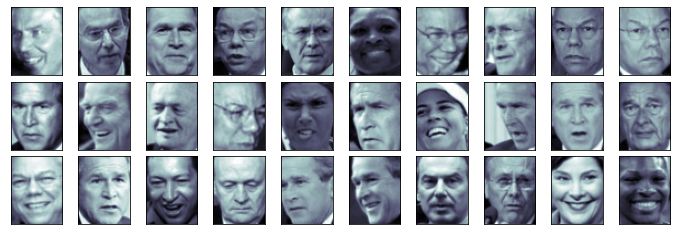

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.datasets import fetch_lfw_people# Download dataset
with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=DeprecationWarning)
    faces = fetch_lfw_people(min_faces_per_person=40)
    
# plot images
fig, axes = plt.subplots(3, 10, figsize=(12, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(faces.data[i].reshape(62, 47), cmap='bone')

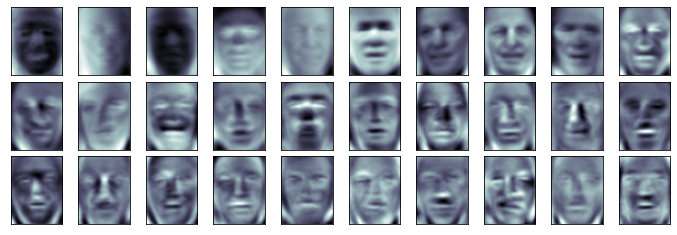

In [3]:
from sklearn.decomposition import PCA

faces_pca = PCA(n_components=150, svd_solver='randomized').fit(faces.data)

# Plot principal components
fig, axes = plt.subplots(3, 10, figsize=(12, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(faces_pca.components_[i].reshape(62, 47), cmap='bone')

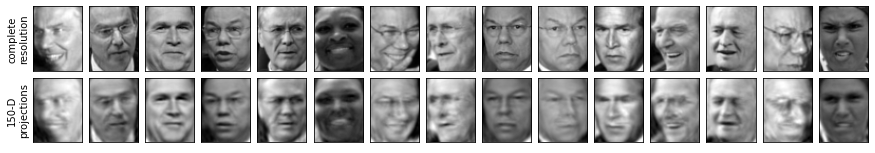

In [4]:
components = faces_pca.transform(faces.data)
projected = faces_pca.inverse_transform(components)

# Plot the results
fig, ax = plt.subplots(2, 15, figsize=(15, 2.5),
 subplot_kw={'xticks':[], 'yticks':[]},
 gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(15):
 ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
 ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
 
ax[0, 0].set_ylabel('complete\nresolution')
ax[1, 0].set_ylabel('150-D\nprojections');